In [1]:
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt
import os
import re

In [2]:
os.chdir(os.path.join(os.getcwd(), 'data'))
files = os.listdir()


In [3]:
language = ['Java', 'C++', 'C', 'C#', 'R', 'Ruby', 'Python', 'JavaScript', 'jQuery', 'PHP', 'Perl', 'VBA', 'objective-c', 'swift','ASP.net']
lang = [ lan.upper() for lan in language]
all_result = {key:0 for key in lang}
all_result

{'ASP.NET': 0,
 'C': 0,
 'C#': 0,
 'C++': 0,
 'JAVA': 0,
 'JAVASCRIPT': 0,
 'JQUERY': 0,
 'OBJECTIVE-C': 0,
 'PERL': 0,
 'PHP': 0,
 'PYTHON': 0,
 'R': 0,
 'RUBY': 0,
 'SWIFT': 0,
 'VBA': 0}

In [4]:
files

['104.csv',
 '123.csv',
 '518.csv',
 'linkedin.csv',
 'pttSoft_count.csv',
 'pttTech_count.csv']

In [5]:
asp_regex = 'ASP.NET|.net|ASP'

for file in files:
    with open(file, 'r', encoding='utf-8') as f:
        pairs = f.read().split('\n')
        pairs = [pair for pair in pairs if len(pair)]
        lan = [pair.split(',')[0].upper() for pair in pairs]
        counts = [pair.split(',')[1] for pair in pairs]
        result = dict(zip(lan, counts))  # {k:v for (k,v) in zip(lan, couonts)}
        for key in result.keys():
            if key in all_result.keys():
                all_result[key] += int(result[key]) 
            if re.match(asp_regex, key):
                all_result['ASP.NET'] += 1

In [6]:
sorted(all_result.items(), key=lambda x:x[1], reverse=True)


[('JAVA', 7174),
 ('JAVASCRIPT', 5276),
 ('C++', 4978),
 ('C#', 4595),
 ('PHP', 4385),
 ('C', 4095),
 ('JQUERY', 3095),
 ('PYTHON', 2016),
 ('RUBY', 1285),
 ('ASP.NET', 888),
 ('OBJECTIVE-C', 845),
 ('R', 469),
 ('PERL', 458),
 ('SWIFT', 252),
 ('VBA', 90)]

In [14]:
result_list = [(k,v) for (k,v) in all_result.items()]

df = pd.DataFrame(result_list)
df.columns = ['Language', 'Counts']
df = df.set_index(['Language'], drop=True)
# df.index = ['Language']


In [15]:
sort_df = df.sort_values(by="Counts", ascending=False)

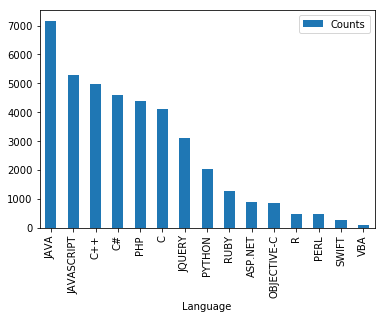

In [16]:
plt.figure(figsize=(20,15))
sort_df.plot(kind='bar')
plt.show()